In [ ]:
#BÀI Cifar100

In [18]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten,Dropout
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [20]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [21]:
train_set=train.flow_from_directory('/content/drive/MyDrive/traicay',target_size = (150,150),batch_size = 10,class_mode = 'categorical')


Found 201 images belonging to 10 classes.


In [22]:
train_set.class_indices


{'cam': 0,
 'chuối': 1,
 'dưa hấu': 2,
 'dứa': 3,
 'lê': 4,
 'mận': 5,
 'ổi': 6,
 'sầu riêng': 7,
 'táo': 8,
 'xoài': 9}

In [28]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(252,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 18, 18, 128)     

In [29]:
history = model.fit(train_set,batch_size=64,epochs=10,verbose=1)


Epoch 1/10
11/21 [==============>...............] - ETA: 22s - loss: 11.9361 - accuracy: 0.1089

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


21/21 [==============================] - 44s 2s/step - loss: 7.1135 - accuracy: 0.1493
Epoch 2/10
21/21 [==============================] - 3s 152ms/step - loss: 1.8985 - accuracy: 0.3085
Epoch 3/10
21/21 [==============================] - 3s 151ms/step - loss: 1.6931 - accuracy: 0.4080
Epoch 4/10
21/21 [==============================] - 3s 150ms/step - loss: 1.3997 - accuracy: 0.4826
Epoch 5/10
21/21 [==============================] - 3s 152ms/step - loss: 1.1887 - accuracy: 0.5672
Epoch 6/10
21/21 [==============================] - 3s 150ms/step - loss: 0.9747 - accuracy: 0.6517
Epoch 7/10
21/21 [==============================] - 3s 151ms/step - loss: 0.9690 - accuracy: 0.6915
Epoch 8/10
21/21 [==============================] - 3s 151ms/step - loss: 0.9459 - accuracy: 0.6866
Epoch 9/10
21/21 [==============================] - 3s 151ms/step - loss: 0.9342 - accuracy: 0.6866
Epoch 10/10
21/21 [==============================] - 3s 149ms/step - loss: 0.7523 - accuracy: 0.7811


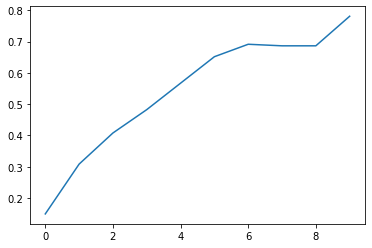

In [30]:
plt.plot(history.history['accuracy'])

In [31]:
model.save('traicay.h5')

In [43]:
labels = {0:'cam',
 1:'chuối',
 2:'dưa hấu',
 3:'dứa',
 4:'lê',
 5:'mận',
 6:'ổi',
 7:'sầu riêng',
 8:'táo',
 9:'xoài'}

In [36]:
import numpy as np
from numpy import argmax
from keras.saving.save import load_model
from keras.preprocessing.image import load_img,img_to_array
model= load_model('traicay.h5')

kết quả dự đoán


'dưa hấu'

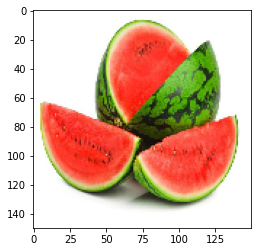

In [44]:
img= load_img('z3436826731783_90951bb43cb204fde58c5f8714eafb3a.jpg',target_size=(150,150))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,150,150,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')

labels[int(np.argmax(result))]

kết quả dự đoán


'ổi'

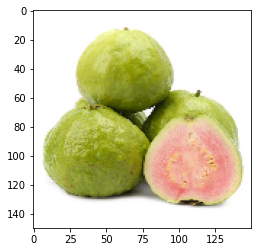

In [45]:
img= load_img('z3437012117452_869a02da0201d47c6373123558e03180.jpg',target_size=(150,150))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,150,150,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')

labels[int(np.argmax(result))]

kết quả dự đoán


'cam'

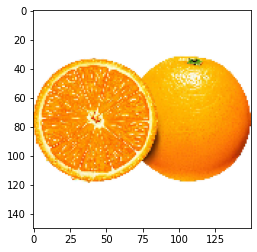

In [46]:
img= load_img('z3436723474947_16d527996390aa9d3e1e2363a4618500.jpg',target_size=(150,150))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,150,150,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')

labels[int(np.argmax(result))]